<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/PCA_LDA_FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis (PCA)

PCA is a technique used to reduce the dimensionality of a dataset while retaining as much of the original variance (information) as possible. Think of it like finding a new way to look at your data that highlights the most important patterns.

We'll start with a simple 2D example (2 features) and use the `numpy` library for calculations and `matplotlib` for visualization. We also introduce and compare with the use of the sklearn PCA module.

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Let's create some simple 2D data
# You can modify this data to show different correlations

# Example 1: highly correlated data
# Create data with 50 data points for highly correlated features
num_data_points = 50
data = np.zeros((num_data_points, 2))
data[:, 0] = np.arange(1, num_data_points + 1)  # Feature 1: 1 to 50
data[:, 1] = data[:, 0] + 1 # Feature 2: Feature 1 + 1 (highly correlated)


#Example 2: Uncorrelated data with more data points
# Define the number of data points (rows) you want
#num_data_points = 150
# Define the number of features (columns) - which is 2 in this case
#num_features = 5
# Create a 2D array of random numbers (e.g., from a standard normal distribution)
#data = np.random.randn(num_data_points, num_features)

#Example 3: Uncorrelated data with with two major comonents
#np.random.seed(42) # for reproducibility
#data = np.random.randn(num_data_points, num_features)
# Scale Feature 1 and 2 to have higher variance and correlate features 3, 4, and 5 with them
#data[:, 0] = data[:, 0] * 5 # Scale Feature 1
#data[:, 1] = data[:, 1] * 4 # Scale Feature 2
#data[:, 2] = data[:, 0] * 0.6 + data[:, 1] * 0.3 + data[:, 2] * 0.1 # Correlate Feature 3 with 1 and 2
#data[:, 3] = data[:, 0] * 0.4 + data[:, 1] * 0.5 + data[:, 3] * 0.1 # Correlate Feature 4 with 1 and 2
#data[:, 4] = data[:, 0] * 0.3 + data[:, 1] * 0.7 + data[:, 4] * 0.1 # Correlate Feature 5 with 1 and 2


# Center the data (subtract the mean)
# This is an important step in PCA
mean = np.mean(data, axis=0)

print("Original Data (first 5 rows):")
print(data[:5])

Original Data (first 5 rows):
[[1. 2.]
 [2. 3.]
 [3. 4.]
 [4. 5.]
 [5. 6.]]


### Step 1: Standardize the Data

Before performing PCA, it's good practice to standardize your data. This means scaling each feature so that it has a mean of 0 and a standard deviation of 1. This prevents features with larger scales from dominating the analysis.

The formula for standardization is:

$z = \frac{x - \mu}{\sigma}$

Where:
- $z$ is the standardized value
- $x$ is the original value
- $\mu$ is the mean of the feature
- $\sigma$ is the standard deviation of the feature

In [85]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("\nScaled Data:")
display(data_scaled)


Scaled Data:


array([[-1.69774938, -1.69774938],
       [-1.62845348, -1.62845348],
       [-1.55915759, -1.55915759],
       [-1.4898617 , -1.4898617 ],
       [-1.4205658 , -1.4205658 ],
       [-1.35126991, -1.35126991],
       [-1.28197402, -1.28197402],
       [-1.21267813, -1.21267813],
       [-1.14338223, -1.14338223],
       [-1.07408634, -1.07408634],
       [-1.00479045, -1.00479045],
       [-0.93549455, -0.93549455],
       [-0.86619866, -0.86619866],
       [-0.79690277, -0.79690277],
       [-0.72760688, -0.72760688],
       [-0.65831098, -0.65831098],
       [-0.58901509, -0.58901509],
       [-0.5197192 , -0.5197192 ],
       [-0.4504233 , -0.4504233 ],
       [-0.38112741, -0.38112741],
       [-0.31183152, -0.31183152],
       [-0.24253563, -0.24253563],
       [-0.17323973, -0.17323973],
       [-0.10394384, -0.10394384],
       [-0.03464795, -0.03464795],
       [ 0.03464795,  0.03464795],
       [ 0.10394384,  0.10394384],
       [ 0.17323973,  0.17323973],
       [ 0.24253563,

Scale sets average to 0 and standard deviation to 1

In [86]:
print('Mean:', data_scaled.mean(axis=0))
print('std:', data_scaled.std(axis=0))

Mean: [4.4408921e-17 4.4408921e-17]
std: [1. 1.]


### Step 2: Calculate the Covariance Matrix

The covariance matrix shows the relationships between different features in your data. A positive covariance means that as one feature increases, the other tends to increase as well. A negative covariance means that as one feature increases, the other tends to decrease.

For a dataset with two features (x and y), the covariance matrix is:

$Cov(X, Y) = \begin{pmatrix} Cov(x, x) & Cov(x, y) \\ Cov(y, x) & Cov(y, y) \end{pmatrix}$

Where:
- $Cov(x, x)$ is the variance of x
- $Cov(y, y)$ is the variance of y
- $Cov(x, y)$ is the covariance between x and y ($Cov(x, y) = Cov(y, x)$)

The formula for covariance between two features x and y is:

$Cov(x, y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1}$

Where:
- $x_i$ and $y_i$ are the individual data points
- $\bar{x}$ and $\bar{y}$ are the means of features x and y
- $n$ is the number of data points

In [87]:
covariance_matrix = np.cov(data_scaled.T) # Transpose the data to get features as rows
print("\nCovariance Matrix of Scaled Data:")
display(covariance_matrix)

# Add a check for the diagonal values (variances)
print("\nDiagonal elements of Covariance Matrix (Variances of scaled data):")
display(np.diag(covariance_matrix))


Covariance Matrix of Scaled Data:


array([[1.02040816, 1.02040816],
       [1.02040816, 1.02040816]])


Diagonal elements of Covariance Matrix (Variances of scaled data):


array([1.02040816, 1.02040816])

### Relationship between Covariance and Correlation Matrices for Standardized Data

When you standardize your data (mean = 0, standard deviation = 1), the covariance matrix of the standardized data is equal to the correlation matrix of the original data (at large number of data points). This is because the formula for covariance between two standardized variables simplifies to the formula for the correlation coefficient.

Let's calculate the correlation matrix of the original data and compare it to the covariance matrix of the scaled data.

In [88]:
# Calculate the correlation matrix of the original data
import numpy as np
correlation_matrix = np.corrcoef(data.T) # Transpose the data to get features as rows

print("\nCorrelation Matrix of Original Data:")
display(correlation_matrix)

print("\nCovariance Matrix of Scaled Data (should be the sam if enough data points):")
display(covariance_matrix) # This was calculated in a previous step


Correlation Matrix of Original Data:


array([[1., 1.],
       [1., 1.]])


Covariance Matrix of Scaled Data (should be the sam if enough data points):


array([[1.02040816, 1.02040816],
       [1.02040816, 1.02040816]])

the n-1 term in the denominator makes the covariance matrix to slowly converge to 1. In a PCA, this does not cause any problem, because we are interesting in relative differences. Let's visualize the correlation matrix using seaborn:

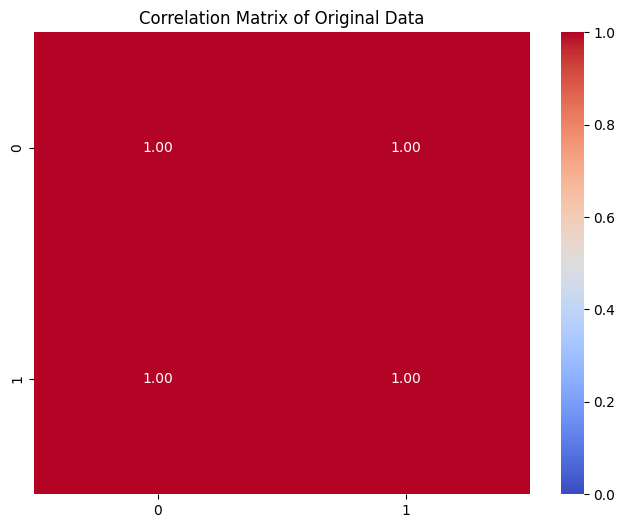

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Correlation Matrix of Original Data')
plt.show()

### Step 3: Calculate Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are the core of PCA.

- **Eigenvectors** are the directions (or principal components) that capture the most variance in the data. They are orthogonal (perpendicular) to each other.
- **Eigenvalues** represent the magnitude of the variance along the corresponding eigenvector. The eigenvector with the highest eigenvalue is the first principal component, the one with the second highest is the second principal component, and so on.

We find the eigenvalues and eigenvectors of the covariance matrix.

In [90]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("\nEigenvalues:")
display(eigenvalues)
print("\nEigenvectors:")
display(eigenvectors)


Eigenvalues:


array([2.04081633e+00, 2.22044605e-16])


Eigenvectors:


array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

### Step 4: Sort Eigenvalues and Select Principal Components

We sort the eigenvalues in descending order and select the eigenvectors corresponding to the largest eigenvalues. These are our principal components.

In a 2D example, we'll have two principal components. For dimensionality reduction, we would select fewer principal components than the original number of features.

In [91]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

print("\nSorted Eigenvalues:")
display(eigenvalues_sorted)
print("\nSorted Eigenvectors (Principal Components):")
display(eigenvectors_sorted)


Sorted Eigenvalues:


array([2.04081633e+00, 2.22044605e-16])


Sorted Eigenvectors (Principal Components):


array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

### Step 4: with sklearn and PCA()

In [92]:
pca_=PCA()
model_pca=pca_.fit(data_scaled)

In [93]:
print("eigenvalues: ", model_pca.explained_variance_)
print("eigenvectors: ", model_pca.components_)


eigenvalues:  [2.04081633 0.        ]
eigenvectors:  [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


### About Loadings

Loadings are the coefficients of the linear combination of the original features that form the principal components. In simpler terms, they indicate how much each original feature contributes to each principal component. The loadings are essentially the eigenvectors, but they are often scaled by the square root of the corresponding eigenvalue or standardized in other ways for interpretation.

For a given principal component, a loading with a larger absolute value indicates that the corresponding original feature has a stronger influence on that principal component. The sign of the loading indicates the direction of the relationship (positive or negative correlation).

**Note about signs:**
Eigenvectors represent directions in space. For any given eigenvector $\mathbf{v}$$\mathbf{v}$, $-\mathbf{v}$$-\mathbf{v}$ is also a valid eigenvector for the same eigenvalue. Both vectors point along the same line, just in opposite directions.

When np.linalg.eig calculates the eigenvectors, it picks one of these two possible directions. Similarly, sklearn.decomposition.PCA also picks a direction for its principal components (which are the eigenvectors). The specific direction chosen by np.linalg.eig might be the exact opposite of the direction chosen by sklearn.decomposition.PCA.

Since the scores are calculated by projecting the data onto these eigenvectors, if the eigenvector direction is flipped, the signs of the projected values (the scores) will also be flipped.

However, this difference in sign doesn't affect the actual PCA result in terms of variance explained or the relative positions of the data points in the reduced-dimensional space. The relationships and distances between the data points are preserved regardless of the sign of the principal components.

In short, the flipped signs are a result of the arbitrary direction choice for the eigenvectors, which is mathematically valid.

**Interpreting the Loadings:**

Looking at the output above:

- **First Principal Component (first column of the eigenvectors):** The values in this column tell us the contribution of each original feature to the first principal component. A larger absolute value means a greater contribution. The signs indicate the direction of the relationship.
- **Second Principal Component (second column of the eigenvectors):** Similarly, the values in this column show the contribution of each original feature to the second principal component.

In our 2D example, the eigenvectors show the direction of the principal components in the original feature space. The magnitude of these vectors is 1 (they are unit vectors). When we look at the biplot, the length of the arrows representing the features is related to these loadings and the variance explained by the principal components.

### Step 5: Project Data onto Principal Components (compute scores)

Finally, we project the original data onto the selected principal components to get the reduced-dimensionality data. This is done by taking the dot product of the scaled data and the matrix of selected eigenvectors.

Formula for projection:

$Data_{projected} = Data_{scaled} \cdot Eigenvectors_{selected}$

Let's first do it the numpy way...

In [94]:
scores_np = np.dot(data_scaled, eigenvectors)

print("\nData Projected onto both Principal Components computed with numpy:")
display(scores_np)


Data Projected onto both Principal Components computed with numpy:


array([[-2.40098019e+00, -4.87648778e-16],
       [-2.30298100e+00, -3.49281069e-16],
       [-2.20498181e+00, -3.67922606e-16],
       [-2.10698262e+00, -2.29554897e-16],
       [-2.00898343e+00, -3.13231793e-16],
       [-1.91098423e+00, -3.31873330e-16],
       [-1.81298504e+00, -3.04527924e-16],
       [-1.71498585e+00, -3.23169461e-16],
       [-1.61698666e+00, -2.95824055e-16],
       [-1.51898747e+00, -2.03443289e-16],
       [-1.42098828e+00, -1.76097883e-16],
       [-1.32298909e+00, -2.27257099e-16],
       [-1.22498989e+00, -1.67394014e-16],
       [-1.12699070e+00, -1.40048607e-16],
       [-1.02899151e+00, -1.91207824e-16],
       [-9.30992319e-01, -1.31344738e-16],
       [-8.32993128e-01, -1.26992803e-16],
       [-7.34993936e-01, -1.22640869e-16],
       [-6.36994745e-01, -7.90366225e-17],
       [-5.38995553e-01, -7.46846879e-17],
       [-4.40996362e-01, -7.03327532e-17],
       [-3.42997170e-01, -5.44840827e-17],
       [-2.44997979e-01, -3.62543603e-17],
       [-1.

And with sklearn and pca...

In [95]:

# We can also project onto both components to see the data in the new coordinate system
data_pca = pca_.fit_transform(data_scaled)

print("\nData Projected onto Both Principal Components with sklearn and PCA:")
display(data_pca)


Data Projected onto Both Principal Components with sklearn and PCA:


array([[-2.40098019e+00,  7.71161281e-17],
       [-2.30298100e+00, -5.35581911e-17],
       [-2.20498181e+00, -2.72232645e-17],
       [-2.10698262e+00,  6.41470212e-17],
       [-2.00898343e+00, -6.65272980e-17],
       [-1.91098423e+00, -4.01923714e-17],
       [-1.81298504e+00,  5.11779143e-17],
       [-1.71498585e+00, -3.35094616e-17],
       [-1.61698666e+00, -5.31614783e-17],
       [-1.51898747e+00, -2.68265517e-17],
       [-1.42098828e+00, -4.64785685e-17],
       [-1.32298909e+00,  1.23740377e-17],
       [-1.22498989e+00, -3.97956586e-17],
       [-1.12699070e+00,  5.15746271e-17],
       [-1.02899151e+00, -5.95069214e-19],
       [-9.30992319e-01,  2.74638572e-18],
       [-8.32993128e-01,  6.08784065e-18],
       [-7.34993936e-01,  9.42929558e-18],
       [-6.36994745e-01, -2.64815610e-17],
       [-5.38995553e-01, -2.31401060e-17],
       [-4.40996362e-01,  7.95692452e-18],
       [-3.42997170e-01, -1.98356405e-19],
       [-2.44997979e-01,  3.14309853e-18],
       [-1.

### Step 6: Visualize the Results
Let's visualize the original data and the data projected onto the principal components (only relevant for n=2).


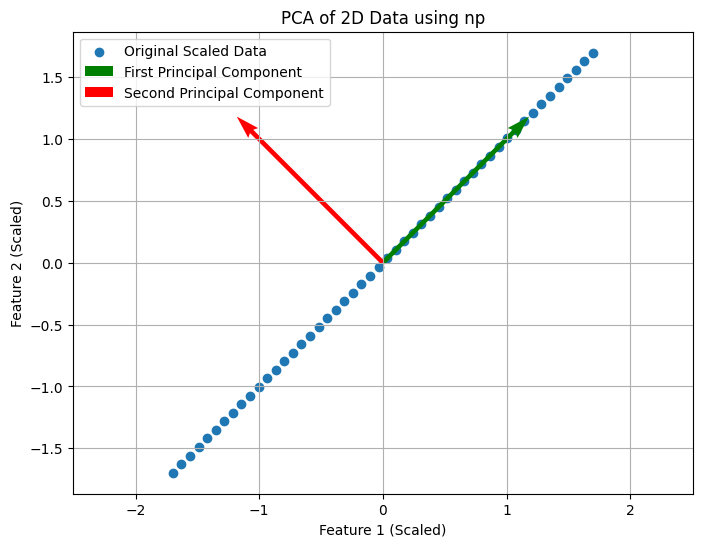

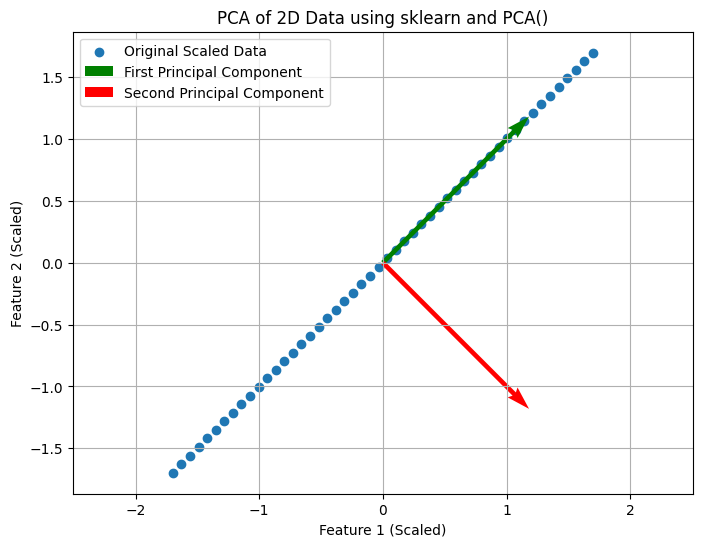

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], label='Original Scaled Data')
plt.quiver(0, 0, eigenvectors_sorted[0, 0], eigenvectors_sorted[1, 0], scale=3, color='g', label='First Principal Component')
plt.quiver(0, 0, eigenvectors_sorted[0, 1], eigenvectors_sorted[1, 1], scale=3, color='r', label='Second Principal Component')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('PCA of 2D Data using np')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], label='Original Scaled Data')
plt.quiver(0, 0, pca_.components_[0, 0], pca_.components_[1, 0], scale=3, color='g', label='First Principal Component')
plt.quiver(0, 0, pca_.components_[0, 1], pca_.components_[1, 1], scale=3, color='r', label='Second Principal Component')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('PCA of 2D Data using sklearn and PCA()')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

### Score Plot

A score plot visualizes the data points in the space of the principal components. For a 2D PCA, this plot shows the data points projected onto the first two principal components.

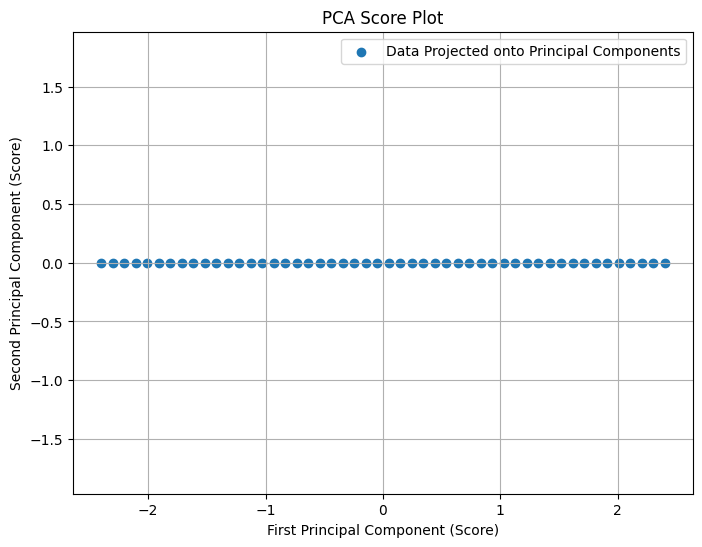

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], label='Data Projected onto Principal Components')
plt.xlabel('First Principal Component (Score)')
plt.ylabel('Second Principal Component (Score)')
plt.title('PCA Score Plot')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

The score plot shows the data points in the new space defined by the principal components.

### Biplot

A biplot combines the score plot and the loadings (scaled eigenvectors) to visualize both the data points and the influence of the original features on the principal components. This helps in interpreting the principal components. The arrows represent the original features, and their direction and length indicate how much they contribute to each principal component.

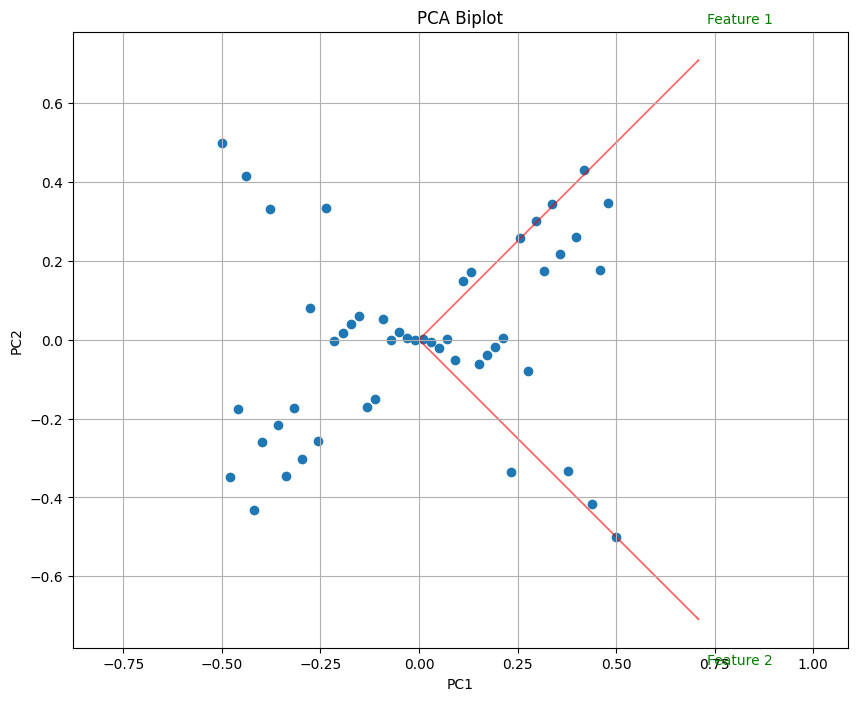

In [98]:
def biplot(score, coeff, labels=None, var_names=None):
    """
    Biplot for PCA.

    Args:
        score (np.ndarray): Projected data (scores).
        coeff (np.ndarray): Loadings (eigenvectors).
        labels (np.ndarray, optional): Class labels for coloring data points. Defaults to None.
        var_names (list, optional): Names of original variables. Defaults to None.
    """
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if labels is not None:
        unique_labels = np.unique(labels)
        colors = plt.cm.get_cmap('viridis', len(unique_labels))
        for i, label in enumerate(unique_labels):
            plt.scatter(xs[labels == label] * scalex, ys[labels == label] * scaley, color=colors(i), label=f'Class {label}')
        plt.legend()
    else:
        plt.scatter(xs * scalex, ys * scaley)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if var_names is not None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, var_names[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(10, 8))
# We use data_pca which is the projection onto all principal components
# We use pca_.components_ which contains loadings for all principal components
biplot(data_pca, pca_.components_.T, var_names=[f'Feature {i+1}' for i in range(data.shape[1])])
plt.title('PCA Biplot')
plt.axis('equal')
plt.show()

 The arrows represent the original features and their relationship to the principal components. The direction and length of the arrows indicate the influence of each original feature on the principal components and they relate to the clusters or patterns observed in the data points.

### Explained Variance Ratio - Scree plot

The explained variance ratio for each principal component tells us the proportion of the total variance in the dataset that is captured by that component. It is calculated by dividing the eigenvalue of a principal component by the sum of all eigenvalues.

Formula for Explained Variance Ratio:

$Explained\ Variance\ Ratio_i = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}$

Where:
- $\lambda_i$ is the eigenvalue of the $i$-th principal component
- $\sum_{j=1}^{p} \lambda_j$ is the sum of all eigenvalues (where $p$ is the total number of features)

The sum of the explained variance ratios for all principal components will always be 1.0. When performing dimensionality reduction, we typically choose a number of principal components that capture a sufficiently high percentage of the total variance (e.g., 95%).

In [99]:
# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

print("\nExplained Variance Ratio for each Principal Component:")
display(explained_variance_ratio)


# You can also use the PCA object to get the explained variance ratio
print("\nExplained Variance Ratio from PCA object:")
display(pca_.explained_variance_ratio_)


Explained Variance Ratio for each Principal Component:


array([1.00000000e+00, 1.08801856e-16])


Explained Variance Ratio from PCA object:


array([1., 0.])

In the output above:

- The first value in the "Explained Variance Ratio for each Principal Component" array is the proportion of variance explained by the first principal component.
- The second value is the proportion of variance explained by the second principal component.

You can see that the sum of these ratios is 1.0, confirming that all the variance is explained by the two components in this 2D example. When working with higher-dimensional data, you would look at these ratios to decide how many principal components to keep.

A coomon way to report this is to use a scree plot. Here are some examples:

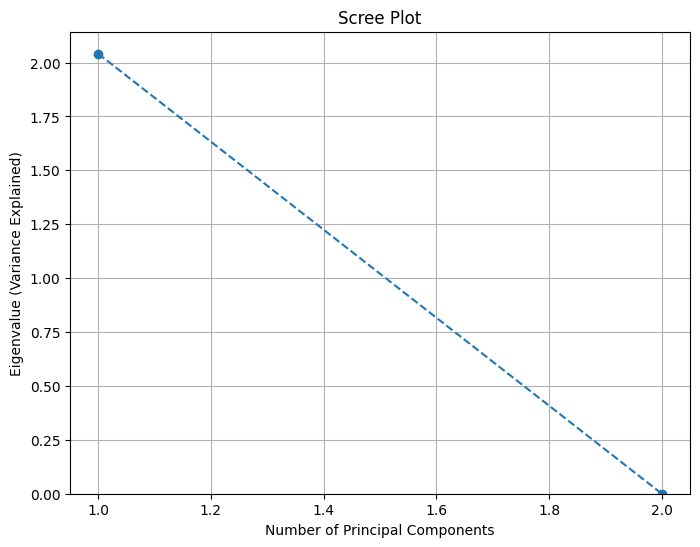

In [100]:
#plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues_sorted) + 1), eigenvalues_sorted, marker='o', linestyle='--')
plt.ylim(bottom=0) # Set the lower limit of the y-axis to 0
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue (Variance Explained)')
plt.grid(True)
plt.show()

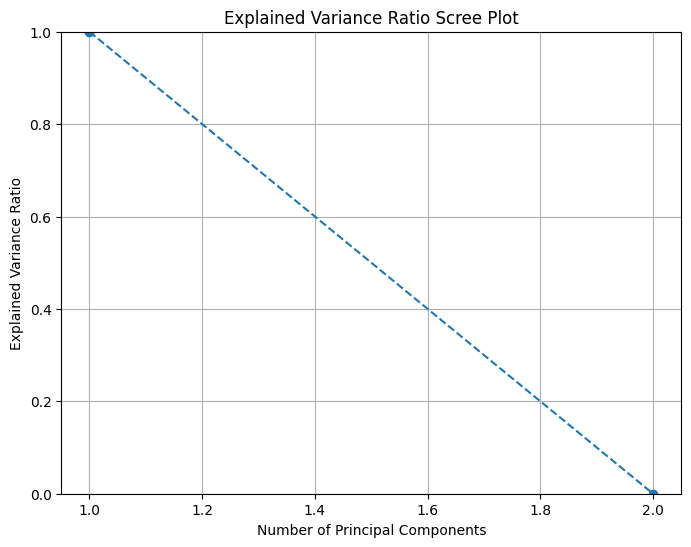

In [101]:
# plot ratio of explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0, 1) # Explained variance ratio ranges from 0 to 1
plt.grid(True)
plt.show()


Cumulative Explained Variance:


array([1., 1.])

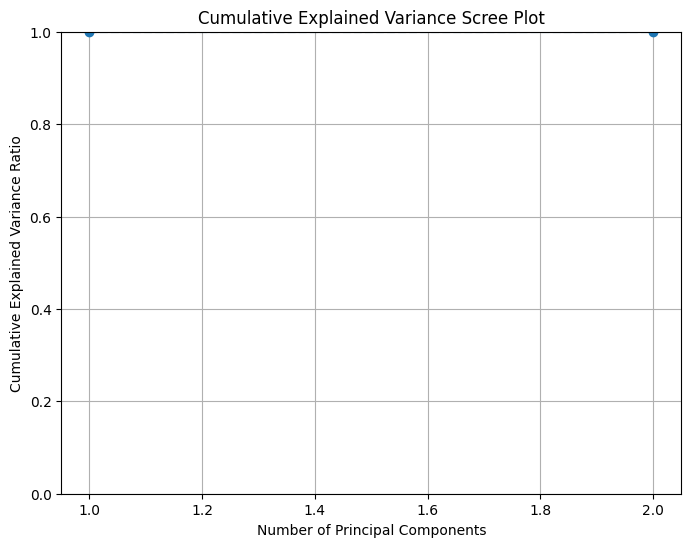

In [102]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("\nCumulative Explained Variance:")
display(cumulative_explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.ylim(0, 1) # Cumulative explained variance ranges from 0 to 1
plt.grid(True)
plt.show()

## Summary of the PCA Process

Here's a recap of the steps involved in performing Principal Component Analysis (PCA), as demonstrated in this notebook:

1.  **Standardize the Data:** We started by standardizing the data to ensure each feature has a mean of 0 and a standard deviation of 1. This is important so that features with larger scales don't disproportionately influence the results.
2.  **Calculate the Covariance Matrix:** We then calculated the covariance matrix, which shows the relationships and variances between the different features in the dataset.
3.  **Calculate Eigenvalues and Eigenvectors:** The core of PCA involves calculating the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors represent the directions of maximum variance (principal components), and eigenvalues indicate the magnitude of that variance.
4.  **Sort Eigenvalues and Select Principal Components:** We sorted the eigenvalues in descending order and their corresponding eigenvectors. The eigenvectors with the largest eigenvalues are the most important principal components as they capture the most variance. For dimensionality reduction, you select a subset of these components.
5.  **Project Data onto Principal Components:** We projected the original scaled data onto the selected principal components. This results in the "scores," which are the data points in the new, reduced-dimensionality space.
6.  **Visualize the Results:** We visualized the results using scatter plots, a score plot, and a biplot to understand the data in the new principal component space and the relationship between the original features and the principal components.
7.  **Understand Explained Variance and Loadings:** We discussed the explained variance ratio, which tells us how much variance each principal component captures, and the loadings (eigenvectors), which indicate the contribution of each original feature to the principal components.

By following these steps, PCA helps us identify the most important patterns in the data and reduce its dimensionality while preserving as much information as possible.

## Excercise:

You can modify the `data` array at the beginning of the code to see how the principal components change with different correlations between the features.

This will help you understand how PCA finds the directions of maximum variance in the data.

## Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique that is particularly useful for classification problems. Unlike PCA, which finds directions of maximum variance in the data, LDA finds the directions (linear discriminants) that maximize the separation between classes.

We'll start with a simple 2D example with two classes.

Original Data:
[[1.  2. ]
 [2.  3. ]
 [3.  4. ]
 [1.5 2.5]
 [2.5 3.5]
 [4.  5. ]
 [5.  6. ]
 [6.  7. ]
 [4.5 5.5]
 [5.5 6.5]]

Class Labels:
[0 0 0 0 0 1 1 1 1 1]


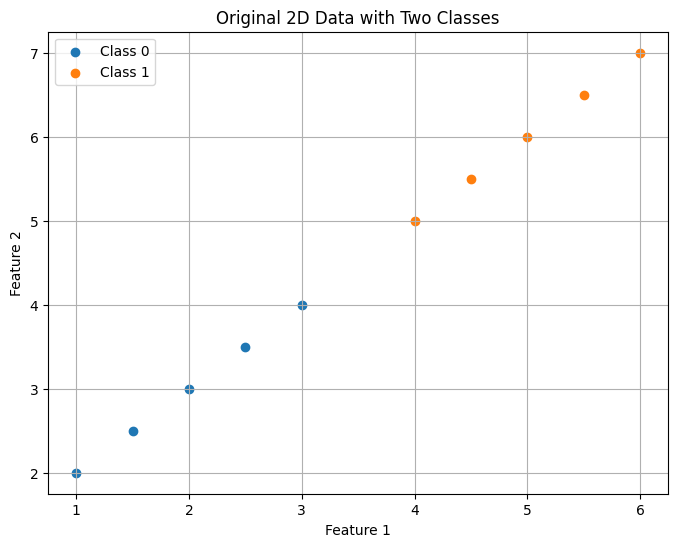

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Let's create some simple 2D data with two classes
# Class 1
data_class1 = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [1.5, 2.5],
    [2.5, 3.5]
])

# Class 2
data_class2 = np.array([
    [4, 5],
    [5, 6],
    [6, 7],
    [4.5, 5.5],
    [5.5, 6.5]
])

# Combine the data
data = np.vstack((data_class1, data_class2))

# Create labels for the classes
labels = np.array([0] * len(data_class1) + [1] * len(data_class2))

print("Original Data:")
print(data)
print("\nClass Labels:")
print(labels)

# Visualize the original data
plt.figure(figsize=(8, 6))
plt.scatter(data_class1[:, 0], data_class1[:, 1], label='Class 0')
plt.scatter(data_class2[:, 0], data_class2[:, 1], label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original 2D Data with Two Classes')
plt.legend()
plt.grid(True)
plt.show()

### Step 1: Standardize the Data

Similar to PCA, it's good practice to standardize your data before performing LDA, especially if the features have different scales.

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("\nScaled Data:")
display(data_scaled)


Scaled Data:


array([[-1.50755672, -1.50755672],
       [-0.90453403, -0.90453403],
       [-0.30151134, -0.30151134],
       [-1.20604538, -1.20604538],
       [-0.60302269, -0.60302269],
       [ 0.30151134,  0.30151134],
       [ 0.90453403,  0.90453403],
       [ 1.50755672,  1.50755672],
       [ 0.60302269,  0.60302269],
       [ 1.20604538,  1.20604538]])

### Step 2: Calculate the Mean Vectors for Each Class

We need to calculate the mean vector for each class in the scaled data.

In [ ]:
mean_vectors = []
for cl in np.unique(labels):
    mean_vectors.append(np.mean(data_scaled[labels == cl], axis=0))
    print(f'Mean Vector Class {cl}: {mean_vectors[cl]}')

Mean Vector Class 0: [-0.90453403 -0.90453403]
Mean Vector Class 1: [0.90453403 0.90453403]


### Step 3: Calculate the Within-Class Scatter Matrix ($S_W$)

The within-class scatter matrix measures the scatter of data points within each class. A smaller $S_W$ indicates that the data points within each class are clustered closely together.

$S_W = \sum_{i=1}^{c} S_i$

Where $c$ is the number of classes, and $S_i$ is the scatter matrix for class $i$:

$S_i = \sum_{\mathbf{x} \in D_i} (\mathbf{x} - \mathbf{m}_i)(\mathbf{x} - \mathbf{m}_i)^T$

Where $D_i$ is the set of samples in class $i$, $\mathbf{x}$ is a sample, and $\mathbf{m}_i$ is the mean vector for class $i$.

In [ ]:
n_features = data_scaled.shape[1]
S_W = np.zeros((n_features, n_features))

for cl, mv in zip(np.unique(labels), mean_vectors):
    class_scatter_matrix = np.zeros((n_features, n_features))
    for row in data_scaled[labels == cl]:
        row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
        class_scatter_matrix += (row - mv).dot((row - mv).T)
    S_W += class_scatter_matrix

print('Within-Class Scatter Matrix:')
display(S_W)

Within-Class Scatter Matrix:


array([[1.81818182, 1.81818182],
       [1.81818182, 1.81818182]])

### Step 4: Calculate the Between-Class Scatter Matrix ($S_B$)

The between-class scatter matrix measures the scatter between the class means. A larger $S_B$ indicates that the class means are spread further apart.

$S_B = \sum_{i=1}^{c} N_i (\mathbf{m}_i - \mathbf{m})(\mathbf{m}_i - \mathbf{m})^T$

Where $c$ is the number of classes, $N_i$ is the number of samples in class $i$, $\mathbf{m}_i$ is the mean vector for class $i$, and $\mathbf{m}$ is the overall mean vector of the data.

In [ ]:
overall_mean = np.mean(data_scaled, axis=0).reshape(n_features, 1)
S_B = np.zeros((n_features, n_features))

for cl, mv in zip(np.unique(labels), mean_vectors):
    n = data_scaled[labels == cl].shape[0]
    mv = mv.reshape(n_features, 1)
    S_B += n * (mv - overall_mean).dot((mv - overall_mean).T)

print('Between-Class Scatter Matrix:')
display(S_B)

Between-Class Scatter Matrix:


array([[8.18181818, 8.18181818],
       [8.18181818, 8.18181818]])

### Step 5: Solve the Generalized Eigenvalue Problem

We need to solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$. The eigenvectors will be our linear discriminants, and the eigenvalues will represent the separation achieved by each discriminant.

$S_B \mathbf{v} = \lambda S_W \mathbf{v}$

This is equivalent to finding the eigenvectors and eigenvalues of $S_W^{-1}S_B$.

In [ ]:
# Calculate the inverse of the within-class scatter matrix
S_W_inv = np.linalg.inv(S_W)

# Calculate the matrix S_W_inv * S_B
matrix_for_eig = S_W_inv.dot(S_B)

# Calculate the eigenvalues and eigenvectors
eigenvalues_lda, eigenvectors_lda = np.linalg.eig(matrix_for_eig)

print("\nEigenvalues (LDA):")
display(eigenvalues_lda)
print("\nEigenvectors (Linear Discriminants):")
display(eigenvectors_lda)


Eigenvalues (LDA):


array([0.        , 4.09090909])


Eigenvectors (Linear Discriminants):


array([[-0.70710678,  0.439027  ],
       [ 0.70710678, -0.89847387]])

### Step 6: Sort Eigenvalues and Select Linear Discriminants

We sort the eigenvalues in descending order and select the eigenvectors corresponding to the largest eigenvalues. These are our most important linear discriminants. For a classification problem with $k$ classes, we can find at most $k-1$ useful linear discriminants. In our 2-class example, we will have at most 1 useful discriminant.

In [ ]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices_lda = np.argsort(eigenvalues_lda)[::-1]
eigenvalues_lda_sorted = eigenvalues_lda[sorted_indices_lda]
eigenvectors_lda_sorted = eigenvectors_lda[:, sorted_indices_lda]

print("\nSorted Eigenvalues (LDA):")
display(eigenvalues_lda_sorted)
print("\nSorted Eigenvectors (Linear Discriminants):")
display(eigenvectors_lda_sorted)


Sorted Eigenvalues (LDA):


array([4.09090909, 0.        ])


Sorted Eigenvectors (Linear Discriminants):


array([[ 0.439027  , -0.70710678],
       [-0.89847387,  0.70710678]])

### Step 7: Project Data onto Linear Discriminants

Finally, we project the original scaled data onto the selected linear discriminants to get the reduced-dimensionality data.

Formula for projection:

$Data_{projected\_LDA} = Data_{scaled} \cdot Eigenvectors_{selected\_LDA}$

In [ ]:
# Select the first linear discriminant (the eigenvector with the largest eigenvalue)
linear_discriminant = eigenvectors_lda_sorted[:, 0].reshape(-1, 1)

# Project the scaled data onto the linear discriminant
data_lda_projected = data_scaled.dot(linear_discriminant)

print("\nOriginal Data (Scaled):")
display(data_scaled)
print("\nData Projected onto First Linear Discriminant:")
display(data_lda_projected)


Original Data (Scaled):


array([[-1.50755672, -1.50755672],
       [-0.90453403, -0.90453403],
       [-0.30151134, -0.30151134],
       [-1.20604538, -1.20604538],
       [-0.60302269, -0.60302269],
       [ 0.30151134,  0.30151134],
       [ 0.90453403,  0.90453403],
       [ 1.50755672,  1.50755672],
       [ 0.60302269,  0.60302269],
       [ 1.20604538,  1.20604538]])


Data Projected onto First Linear Discriminant:


array([[ 0.69264221],
       [ 0.41558533],
       [ 0.13852844],
       [ 0.55411377],
       [ 0.27705688],
       [-0.13852844],
       [-0.41558533],
       [-0.69264221],
       [-0.27705688],
       [-0.55411377]])

### Step 8: Visualize the Results

Let's visualize the data projected onto the first linear discriminant.

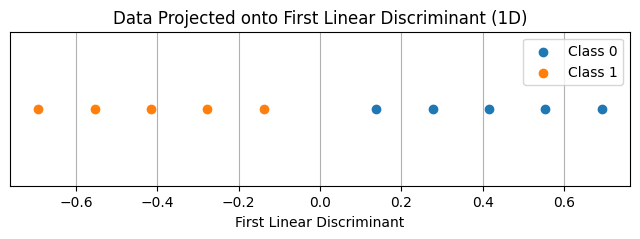

In [ ]:
plt.figure(figsize=(8, 2))
plt.scatter(data_lda_projected[labels == 0], np.zeros_like(data_lda_projected[labels == 0]), label='Class 0')
plt.scatter(data_lda_projected[labels == 1], np.zeros_like(data_lda_projected[labels == 1]), label='Class 1')
plt.xlabel('First Linear Discriminant')
plt.title('Data Projected onto First Linear Discriminant (1D)')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

### Comparing with scikit-learn's LDA

We can compare our manual LDA calculation with the `LinearDiscriminantAnalysis` class from scikit-learn.


Data Projected onto First Linear Discriminant (scikit-learn):


array([[-3.16227766],
       [-1.8973666 ],
       [-0.63245553],
       [-2.52982213],
       [-1.26491106],
       [ 0.63245553],
       [ 1.8973666 ],
       [ 3.16227766],
       [ 1.26491106],
       [ 2.52982213]])

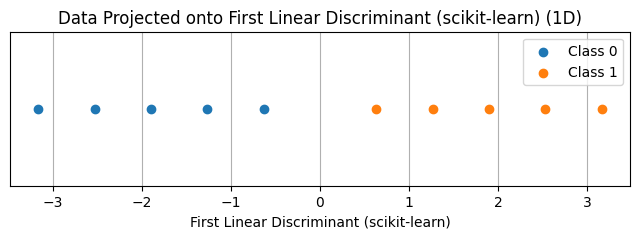

In [ ]:
lda_sklearn = LinearDiscriminantAnalysis(n_components=1)
data_lda_sklearn = lda_sklearn.fit_transform(data_scaled, labels)

print("\nData Projected onto First Linear Discriminant (scikit-learn):")
display(data_lda_sklearn)

plt.figure(figsize=(8, 2))
plt.scatter(data_lda_sklearn[labels == 0], np.zeros_like(data_lda_sklearn[labels == 0]), label='Class 0')
plt.scatter(data_lda_sklearn[labels == 1], np.zeros_like(data_lda_sklearn[labels == 1]), label='Class 1')
plt.xlabel('First Linear Discriminant (scikit-learn)')
plt.title('Data Projected onto First Linear Discriminant (scikit-learn) (1D)')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

You should observe that the projected data points (scores) from our manual calculation and scikit-learn's LDA are very similar, potentially with a difference in sign, which is due to the arbitrary direction of the eigenvectors as discussed in the PCA section. The key is that the separation between the classes is maximized along this discriminant.

### Using the Trained LDA Model for Classification

Once you have trained an LDA model, you can use it to predict the class of new, unseen data points. The new data points should be preprocessed in the same way as the training data (e.g., scaled using the same `StandardScaler` fitted on the training data).

In [ ]:
# Create a new, random data point for classification
# Let's create a point that is likely to belong to Class 0
new_data_point_class_0 = np.array([[1.8, 2.8]]) # Adjust values to be closer to Class 0 data

# Or create a point that is likely to belong to Class 1
new_data_point_class_1 = np.array([[5.2, 6.2]]) # Adjust values to be closer to Class 1 data

print("New Data Point (Class 0 example):")
display(new_data_point_class_0)

print("\nNew Data Point (Class 1 example):")
display(new_data_point_class_1)

New Data Point (Class 0 example):


array([[1.8, 2.8]])


New Data Point (Class 1 example):


array([[5.2, 6.2]])

### Preprocess the New Data Point

It's crucial to preprocess the new data point using the *same* `StandardScaler` that was fitted on the training data.

In [ ]:
# Scale the new data point using the same scaler fitted on the training data
new_data_point_class_0_scaled = scaler.transform(new_data_point_class_0)
new_data_point_class_1_scaled = scaler.transform(new_data_point_class_1)


print("\nScaled New Data Point (Class 0 example):")
display(new_data_point_class_0_scaled)

print("\nScaled New Data Point (Class 1 example):")
display(new_data_point_class_1_scaled)


Scaled New Data Point (Class 0 example):


array([[-1.02513857, -1.02513857]])


Scaled New Data Point (Class 1 example):


array([[1.02513857, 1.02513857]])

### Predict the Class of the New Data Point

Now, use the fitted LDA model (`lda_sklearn`) to predict the class of the scaled new data point.

In [ ]:
# Predict the class using the trained LDA model
predicted_class_0 = lda_sklearn.predict(new_data_point_class_0_scaled)
predicted_class_1 = lda_sklearn.predict(new_data_point_class_1_scaled)


print(f"\nPredicted Class for New Data Point (Class 0 example): {predicted_class_0[0]}")
print(f"Predicted Class for New Data Point (Class 1 example): {predicted_class_1[0]}")

# You can also get the probability estimates for each class
predicted_proba_0 = lda_sklearn.predict_proba(new_data_point_class_0_scaled)
predicted_proba_1 = lda_sklearn.predict_proba(new_data_point_class_1_scaled)


print(f"\nPredicted Probabilities for New Data Point (Class 0 example): {predicted_proba_0[0]}")
print(f"Predicted Probabilities for New Data Point (Class 1 example): {predicted_proba_1[0]}")


Predicted Class for New Data Point (Class 0 example): 0
Predicted Class for New Data Point (Class 1 example): 1

Predicted Probabilities for New Data Point (Class 0 example): [9.99714219e-01 2.85780701e-04]
Predicted Probabilities for New Data Point (Class 1 example): [2.85780701e-04 9.99714219e-01]




## Factor Analysis (FA)

Factor Analysis (FA) is a statistical method used to describe the variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. It's often used to identify the underlying structure in a dataset and reduce dimensionality by representing the original variables as linear combinations of these factors.

Unlike PCA, which focuses on explaining the maximum variance in the data, FA aims to explain the correlations between variables.

We'll use a simple example with synthetic data to illustrate the concept.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

# Let's create some synthetic data with an underlying factor structure
# Assume observed variables are influenced by a set of latent factors

# Number of data points
n_samples = 100

# Number of observed variables
n_features = 6

# Number of latent factors
n_components = 2 # Let's use 2 factors for easier visualization and interpretation

# Generate the latent factor scores (e.g., from a normal distribution)
np.random.seed(42) # for reproducibility
latent_factors = np.random.randn(n_samples, n_components)

# Define some loadings (how much each observed variable is influenced by the factor)
# The loadings matrix should have shape (n_features, n_components)
# Let's define loadings to create a clearer structure:
# Features 1, 2, 3 load highly on Factor 1
# Features 4, 5, 6 load highly on Factor 2
loadings = np.array([
    [ 0.8,  0.1],  # Feature 1 loads on Factor 1
    [ 0.7,  0.2],  # Feature 2 loads on Factor 1
    [ 0.6,  0.1],  # Feature 3 loads on Factor 1
    [ 0.1,  0.9],  # Feature 4 loads on Factor 2
    [ 0.2,  0.8],  # Feature 5 loads on Factor 2
    [ 0.1,  0.7]   # Feature 6 loads on Factor 2
])


# Generate some unique variance (errors) for each observed variable
unique_variance = np.random.randn(n_samples, n_features) * 0.3 # Reduce error a bit to make structure clearer

# Generate the observed data based on the factor model: Observed = Factors @ Loadings.T + Error
data = latent_factors @ loadings.T + unique_variance

print("Generated Synthetic Data with Clearer Factor Structure:")
display(data[:5]) # Display first 5 rows

Generated Synthetic Data with Clearer Factor Structure:


array([[ 0.4908811 ,  0.4882824 ,  0.60911743,  0.24137416, -0.42456942,
        -0.32846111],
       [ 0.8249644 ,  0.91212373,  0.69543041,  2.59131517,  1.51922875,
         1.47155945],
       [ 0.07546413, -0.01531738, -0.25848649, -0.00644783, -0.4659878 ,
        -0.25835679],
       [ 1.19450466,  1.28349816,  1.71866873,  0.28843298,  1.1356684 ,
         0.21131083],
       [-0.46290306,  0.10656512, -0.20814462,  0.11803317,  0.12556204,
         0.53672392]])

### Applying Factor Analysis

Now, let's apply Factor Analysis to this synthetic data using `sklearn.decomposition.FactorAnalysis`. We'll try to recover the underlying factor structure.

In [ ]:
# Standardize the data (important for FA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply Factor Analysis without rotation
# We specify the number of components (latent factors) we expect
fa = FactorAnalysis(n_components=n_components, random_state=42)
data_fa_transformed = fa.fit_transform(data_scaled)

print("\nTransformed Data (Factor Scores - No Rotation):")
display(data_fa_transformed[:5])

print("\nEstimated Loadings (No Rotation):")
display(fa.components_)

print("\nEstimated Unique Variances (Noise Variance):")
display(fa.noise_variance_)


Transformed Data (Factor Scores - No Rotation):


array([[ 0.10315891, -1.01551239],
       [ 2.22247946,  0.10516866],
       [-0.25296402, -0.20281853],
       [ 1.22199173, -1.9141066 ],
       [ 0.18200101,  0.28196214]])


Estimated Loadings (No Rotation):


array([[ 0.54267587,  0.62759728,  0.5482192 ,  0.88864425,  0.93280045,
         0.88281431],
       [-0.71591122, -0.67789058, -0.69035779,  0.34414666,  0.17050223,
         0.27847305]])


Estimated Unique Variances (Noise Variance):


array([0.19280208, 0.14708467, 0.2225815 , 0.09254354, 0.10064046,
       0.14268634])

### Interpretation

In this simple example:

- **Transformed Data (Factor Scores):** These are the estimated scores for the latent factor for each data point.
- **Estimated Loadings:** These represent the estimated influence of the latent factor on each observed variable. Compare these to the `loadings` we used to generate the data (they should be similar, though not exactly the same due to the added noise and the estimation process).
- **Estimated Unique Variances:** These represent the variance in each observed variable that is not explained by the common latent factor(s).

Factor Analysis is more complex than PCA and involves iterative estimation procedures. In practice, determining the optimal number of factors is a key step and often involves methods like parallel analysis or examining eigenvalues.

This simple example demonstrates how FA attempts to uncover underlying latent factors that explain the correlations among observed variables.

### Loading matrix

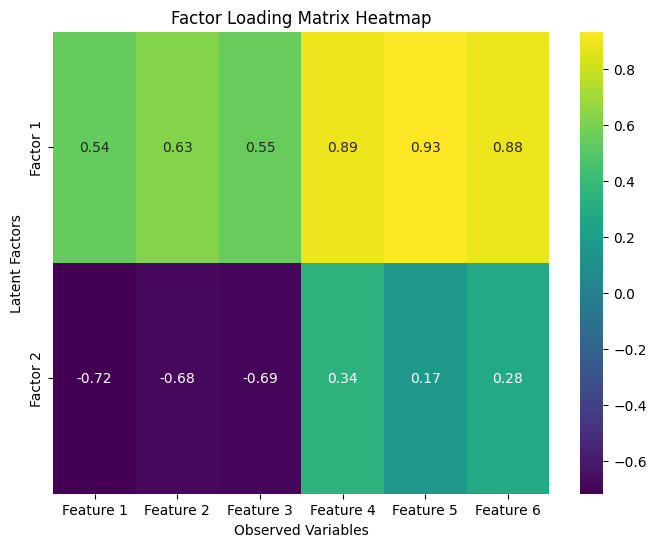

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(fa.components_, annot=True, cmap='viridis', yticklabels=[f'Factor {i+1}' for i in range(fa.n_components)], xticklabels=[f'Feature {i+1}' for i in range(data.shape[1])])
plt.title('Factor Loading Matrix Heatmap')
plt.xlabel('Observed Variables')
plt.ylabel('Latent Factors')
plt.show()

### Interpreting the Factor Loading Matrix Heatmap

The heatmap of the factor loading matrix provides a visual summary of the relationships between your observed variables and the estimated latent factors.

Here's how to interpret it:

-   **Rows:** Each row corresponds to a latent factor (e.g., Factor 1, Factor 2, etc.).
-   **Columns:** Each column corresponds to an original observed variable (e.g., Feature 1, Feature 2, etc.).
-   **Color Intensity:** The intensity of the color in each cell indicates the magnitude (absolute value) of the loading. More intense colors (darker or brighter depending on the colormap) mean a stronger relationship.
-   **Color Hue:** The hue of the color (e.g., different colors in the 'viridis' colormap) represents the value of the loading, often indicating the sign (positive or negative) and the range of values.
-   **Annotated Values:** The numbers annotated in each cell are the actual loading values.

**What the Loadings Tell You:**

-   **Magnitude of Loading:** A loading with a larger absolute value (closer to 1 or -1) indicates that the observed variable has a stronger relationship with that latent factor. This means the variable is heavily influenced by or is a good indicator of that factor.
-   **Sign of Loading:**
    -   A **positive loading** means that as the latent factor increases, the observed variable tends to increase as well.
    -   A **negative loading** means that as the latent factor increases, the observed variable tends to decrease.

**Example Interpretation (referencing the heatmap above):**

Look at the second row (Factor 2). The annotated values and color intensities show how much each Feature contributes to Factor 2. For instance, if Feature 1 has a high negative loading on Factor 2, and Feature 4 has a positive loading, it suggests that Factor 2 might represent an underlying construct where an increase in the factor is associated with an decrease in Feature 1 and a slight increase in Feature 4.

By examining the loadings across all factors and variables, you can try to understand the meaning of each latent factor based on the pattern of variables that load highly on it. This is where the "Factor Analysis" aspect comes in – you are trying to identify the underlying factors that explain the observed correlations.

## Communality and uniqueness

Estimated Uniqueness for each variable:


array([0.19280208, 0.14708467, 0.2225815 , 0.09254354, 0.10064046,
       0.14268634])


Calculated Communality for each variable:


array([0.80702597, 0.85341399, 0.77713818, 0.90812553, 0.89918768,
       0.85690834])


Communality + Uniqueness (should be close to 1 for standardized data):


array([0.99982805, 1.00049865, 0.99971967, 1.00066907, 0.99982814,
       0.99959468])

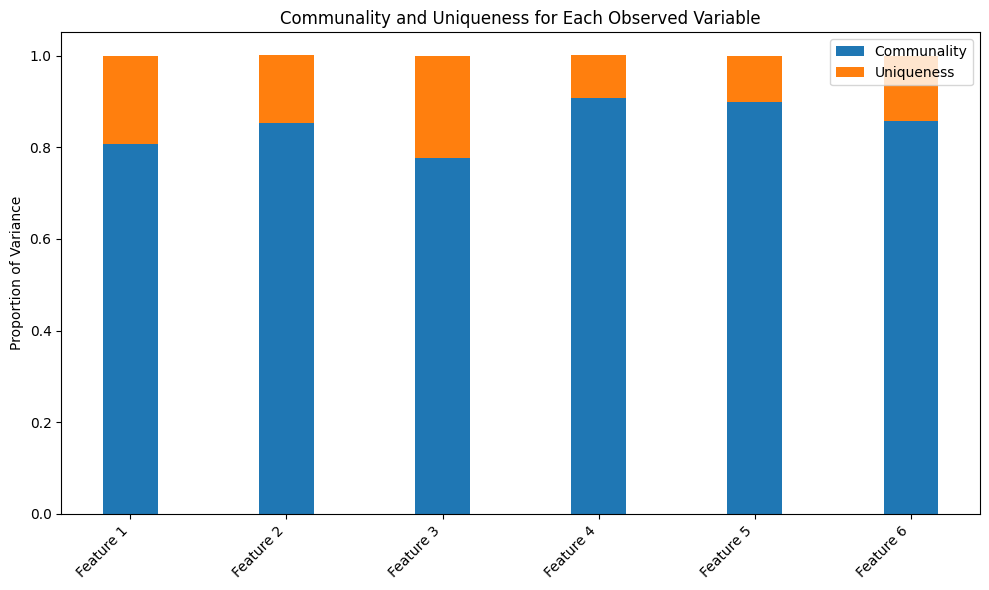

In [ ]:
# Estimated unique variances are available from the FA object
uniqueness = fa.noise_variance_

# Communality can be calculated from the loadings (components_)
# For each variable, communality is the sum of the squared loadings across all factors
communality = np.sum(fa.components_**2, axis=0)

# For standardized data, communality + uniqueness should be close to 1
total_variance_explained = communality + uniqueness

print("Estimated Uniqueness for each variable:")
display(uniqueness)

print("\nCalculated Communality for each variable:")
display(communality)

print("\nCommunality + Uniqueness (should be close to 1 for standardized data):")
display(total_variance_explained)

# Plotting Communality and Uniqueness
variables = [f'Feature {i+1}' for i in range(data.shape[1])]
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(variables, communality, width, label='Communality')
ax.bar(variables, uniqueness, width, bottom=communality, label='Uniqueness')

ax.set_ylabel('Proportion of Variance')
ax.set_title('Communality and Uniqueness for Each Observed Variable')
ax.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In Factor Analysis:

-   **Communality** is the proportion of the variance in an observed variable that is accounted for by the common factors. A high communality means that a variable is well explained by the latent factors.
-   **Uniqueness** (or unique variance) is the proportion of the variance in an observed variable that is *not* accounted for by the common factors. It's the variance specific to that variable plus random error. Uniqueness = 1 - Communality.

`sklearn.decomposition.FactorAnalysis` provides the estimated unique variances (noise variance) directly. We can calculate communality from the estimated loadings.

#### Factor analysis component plot

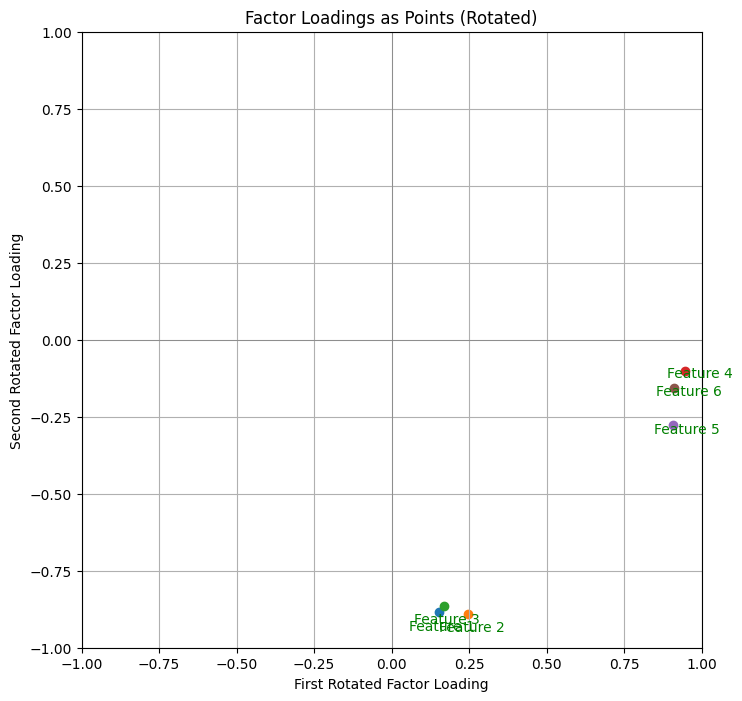

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use the rotated loadings
loadings_matrix = fa_rotated.components_.T # Transpose to get features as rows and factors as columns

plt.figure(figsize=(8, 8))

# Plot each feature as a point in the factor space based on its loadings
for i in range(loadings_matrix.shape[0]):
    plt.scatter(loadings_matrix[i, 0], loadings_matrix[i, 1])
    # Add labels for the features
    plt.text(loadings_matrix[i, 0] * 1.05, loadings_matrix[i, 1] * 1.05, f'Feature {i+1}', color='g', ha = 'center', va = 'center')


plt.xlim(-1, 1) # Set limits based on typical loading values
plt.ylim(-1, 1)
plt.xlabel('First Rotated Factor Loading')
plt.ylabel('Second Rotated Factor Loading')
plt.title('Factor Loadings as Points (Rotated)')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5) # Add origin lines
plt.axvline(0, color='grey', lw=0.5)
plt.show()

This scatter plot shows each data point represented by its estimated scores on the first two latent factors. The spread and patterns in this plot can give you some insight into how the data points relate to these underlying factors.

### Factor Rotation

Factor rotation is a technique used in Factor Analysis to make the loadings more interpretable. After the initial extraction of factors, the factor loadings can be rotated in the factor space. The goal of rotation is typically to achieve a simpler structure in the loading matrix, making it easier to identify which observed variables load highly on which factors.

There are different types of rotations, including orthogonal rotations (like Varimax), which assume the factors are uncorrelated, and oblique rotations (like Oblimin), which allow the factors to be correlated.

Here, we'll apply **Varimax rotation** to the loadings we obtained from the unrotated Factor Analysis. Varimax rotation aims to maximize the variance of the squared loadings for each factor, which tends to result in factors that have high loadings for a small number of variables and near-zero loadings for the rest.


Estimated Loadings (after Varimax rotation):


array([[ 0.15310479,  0.24600101,  0.16976838,  0.94741796,  0.90686136,
         0.91206752],
       [-0.8852033 , -0.89044792, -0.8650531 , -0.10259011, -0.27711038,
        -0.15824403]])


Transformed Data (Factor Scores - After Varimax Rotation):


array([[-0.37492583, -0.94938812],
       [ 2.02235872, -0.92765327],
       [-0.31786684, -0.06392828],
       [ 0.2060013 , -2.26155507],
       [ 0.29119703,  0.16682717]])

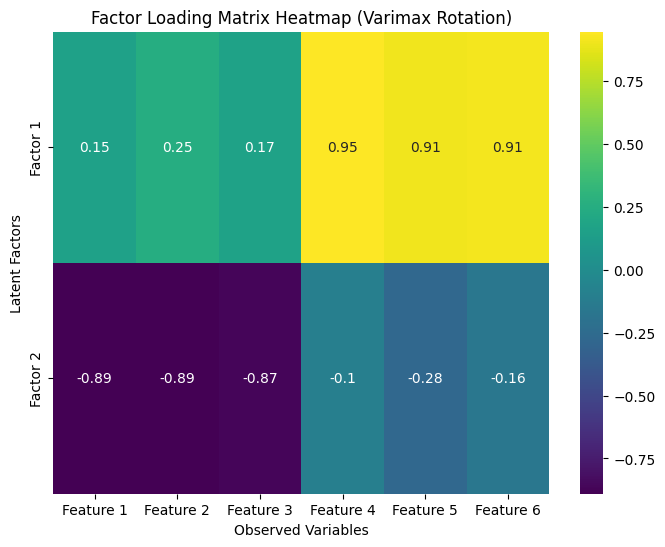

In [ ]:
# Apply Factor Analysis again, this time with Varimax rotation
# We fit a new FactorAnalysis object with the desired rotation
fa_rotated = FactorAnalysis(n_components=n_components, rotation='varimax', random_state=42)
data_fa_transformed_rotated = fa_rotated.fit_transform(data_scaled)

print("\nEstimated Loadings (after Varimax rotation):")
display(fa_rotated.components_)

print("\nTransformed Data (Factor Scores - After Varimax Rotation):")
display(data_fa_transformed_rotated[:5])

# We can also visualize the rotated loading matrix with a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(fa_rotated.components_, annot=True, cmap='viridis', yticklabels=[f'Factor {i+1}' for i in range(fa_rotated.n_components)], xticklabels=[f'Feature {i+1}' for i in range(data.shape[1])])
plt.title('Factor Loading Matrix Heatmap (Varimax Rotation)')
plt.xlabel('Observed Variables')
plt.ylabel('Latent Factors')
plt.show()

Compare the "Estimated Loadings (after Varimax rotation)" with the "Estimated Loadings (No Rotation)" from the previous step. You should notice that the loadings in the rotated matrix are typically closer to either high positive/negative values or zero, making it easier to see which variables strongly relate to which factors.

The heatmap of the rotated loadings also visually highlights this simplified structure.

### Factor analysis component plot

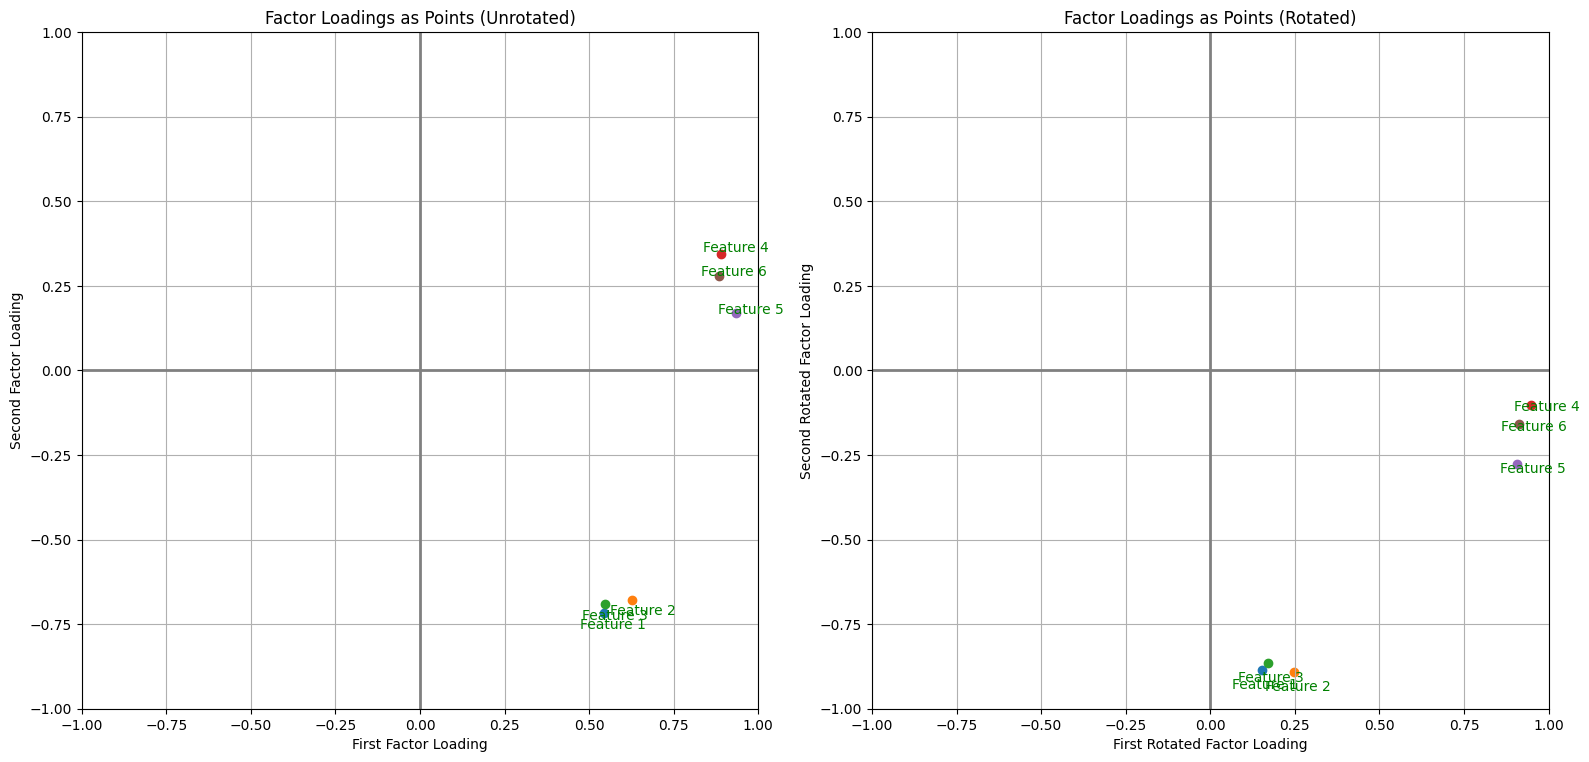

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # Create a figure with two subplots

# Get unrotated and rotated loadings (transposed) for the first two factors
unrotated_loadings = fa.components_.T[:, :2]
rotated_loadings = fa_rotated.components_.T[:, :2]
n_features = unrotated_loadings.shape[0]

# Plot Unrotated Loadings as Points in the first subplot
plt.sca(axes[0]) # Set the current axes to the first subplot
for i in range(n_features):
    plt.scatter(unrotated_loadings[i, 0], unrotated_loadings[i, 1])
    plt.text(unrotated_loadings[i, 0] * 1.05, unrotated_loadings[i, 1] * 1.05, f'Feature {i+1}', color='g', ha = 'center', va = 'center')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('First Factor Loading')
plt.ylabel('Second Factor Loading')
plt.title('Factor Loadings as Points (Unrotated)')
plt.grid(True)
plt.axhline(0, color='grey', lw=2) # Increased linewidth
plt.axvline(0, color='grey', lw=2) # Increased linewidth
plt.gca().set_aspect('equal', adjustable='box')


# Plot Rotated Loadings as Points in the second subplot
plt.sca(axes[1]) # Set the current axes to the second subplot
for i in range(n_features):
    plt.scatter(rotated_loadings[i, 0], rotated_loadings[i, 1])
    plt.text(rotated_loadings[i, 0] * 1.05, rotated_loadings[i, 1] * 1.05, f'Feature {i+1}', color='g', ha = 'center', va = 'center')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('First Rotated Factor Loading')
plt.ylabel('Second Rotated Factor Loading')
plt.title('Factor Loadings as Points (Rotated)')
plt.grid(True)
plt.axhline(0, color='grey', lw=2) # Increased linewidth
plt.axvline(0, color='grey', lw=2) # Increased linewidth
plt.gca().set_aspect('equal', adjustable='box')


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

# Comparison of PCA, LDA, and Factor Analysis

Here's a comparison of Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), and Factor Analysis (FA):

| Feature                 | Principal Component Analysis (PCA)               | Linear Discriminant Analysis (LDA)                | Factor Analysis (FA)                                   |
| :---------------------- | :----------------------------------------------- | :------------------------------------------------ | :----------------------------------------------------- |
| **Goal**                | Maximize variance in the projected data.         | Maximize class separability.                      | Explain correlations among observed variables via latent factors. |
| **Nature**              | Unsupervised dimensionality reduction.           | Supervised dimensionality reduction (requires labels). | Unsupervised (though often used in contexts with implied structure). |
| **Focus**               | Explaining total variance.                       | Explaining variance between classes.              | Explaining covariance/correlation between variables.     |
| **Output**              | Principal Components (orthogonal directions of max variance). | Linear Discriminants (directions of max class separation). | Latent Factors and Loadings (relationship between observed and latent variables). |
| **Assumptions**         | Sensitive to scaling. Assumes linearity.         | Assumes normally distributed data and equal covariance matrices (can be relaxed). | Assumes observed variables are linear combinations of latent factors and unique errors. |
| **Use Cases**           | Dimensionality reduction, noise reduction, visualization, exploratory data analysis. | Classification, dimensionality reduction for classification tasks. | Identifying underlying constructs, psychometrics, data structure exploration. |
| **Number of Components** | Can extract up to min(n_samples, n_features).  | Can extract up to n_classes - 1.                  | The number of factors is typically determined based on explaining correlations. |

**Key Differences and When to Use:**

*   **If your primary goal is to reduce dimensionality while retaining as much of the original data's variance as possible, and you don't have class labels, use PCA.** It finds the directions of greatest variance in your data.
*   **If you have class labels and your goal is to find a lower-dimensional representation that maximizes the separation between these classes, use LDA.** It's specifically designed for supervised dimensionality reduction for classification tasks.
*   **If you believe your observed variables are influenced by a smaller number of underlying, unobserved (latent) factors, and you want to understand this underlying structure and explain the correlations among your variables, use Factor Analysis.** It's more of a modeling approach to uncover latent constructs.

In summary, choose the technique that aligns best with your goal (variance retention, class separation, or latent structure identification) and whether you have class labels available.